<h1 style="font-family:verdana;"> <center>Used Bike Prices In India</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Peace </center></p>

***

<div style='color: #216969;
           background-color:#EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🏗️Import Necessary Libraries
<a class="anchor" id="2"></a>

In [6]:
# Data Wrangling libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime

# Visualization Libraries
from IPython.display import display,HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Machine Learning Estimators
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore the warnings to remove messy output logs
import warnings
warnings.filterwarnings('ignore')

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
📥Importing the Dataset<a class="anchor" id="3"></a>

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chandaninovitasari","key":"0b92740960a87ea682b98d0446a7a3e4"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [9]:
!kaggle datasets download -d ropali/used-bike-price-in-india

  0% 0.00/123k [00:00<?, ?B/s]
100% 123k/123k [00:00<00:00, 79.6MB/s]


In [10]:
!mkdir used-bike-price-in-india
!unzip used-bike-price-in-india.zip -d used-bike-price-in-india
!ls used-bike-price-in-india

Archive:  used-bike-price-in-india.zip
  inflating: used-bike-price-in-india/bikes.csv  
bikes.csv


In [11]:
data = pd.read_csv('/content/used-bike-price-in-india/bikes.csv')

In [12]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [13]:
# 'shape' returns the dimensions of the data
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Number of rows: 7857
Number of columns: 8


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [15]:
data.duplicated().sum()

0

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🧹Data Preprocessing<a class="anchor" id="3"></a>

In [16]:
data.dropna(inplace=True)

In [17]:
data.isnull().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64

In [18]:
data.describe()

,model_year,price
count,7796.000000,7.796000e+03
mean,2015.405849,1.060233e+05
std,3.854537,1.364439e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


## `model_name`

In [19]:
data['company'] = data['model_name'].apply(lambda x:' '.join(x.split()[0:1]))

**Extracting the first word from 'model_name' and assigning it to 'company' column**


In [20]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,Jawa


In [21]:
data['bike_model'] = data['model_name'].apply(lambda x:' '.join(x.split()[1:3]))

In [22]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj,Avenger Cruise
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal,Enfield Classic
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung,GT250R 2012
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj,Dominar 400
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,Jawa,Perak 330cc


## `model_year`

In [23]:
data['age'] = 2023-data['model_year']


I will add a new column and label it "age." This column will display the total number of years that the bike has been ridden.

In [24]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung,GT250R 2012,11
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj,Dominar 400,6
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,Jawa,Perak 330cc,3


**To extract the numeric number, I will remove 'Km' from the 'kms_driven' column.**

In [25]:
data['kms_driven'] = data['kms_driven'].str.replace('Km','')

In [26]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,Hyosung,GT250R 2012,11
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 s,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,Bajaj,Dominar 400,6
4,Jawa Perak 330cc 2020,2020,2000,first owner,bangalore,\n\n,30 bhp,197500,Jawa,Perak 330cc,3


In [27]:
data['kms_driven'].unique()

array(['17000 ', '50000 ', '14795 ', ..., '66780 ', '16510 ', '6407 '],
      dtype=object)

In [28]:
data = data[~data['kms_driven'].str.contains("Mil")]
data = data[data['kms_driven'] != 'Yes ']
data['kms_driven'] = data['kms_driven'].astype(int)

**Filtering out rows where 'kms_driven' does not contain "Mil" and removing rows with 'kms_driven' as 'Yes '.
Converting 'kms_driven' column to integer type.**

In [29]:
data['kms_driven'].unique()

array([17000, 50000, 14795, ..., 66780, 16510,  6407])

## `owner`

In [30]:
data['owner'].unique()

array(['first owner', 'third owner', 'second owner',
       'fourth owner or more'], dtype=object)

## `location`

In [31]:
data['location'].unique()

array(['hyderabad', 'bangalore', 'jaipur', 'chennai', 'ghaziabad',
       'delhi', 'ludhiana', 'jaunpur', 'mumbai', 'chittorgarh',
       'thalassery', 'bathinda', 'dehradun', 'pune', 'navi mumbai',
       'lucknow', 'siliguri', 'gurgaon', 'rajkot', 'patna', 'udaipur',
       'bihar shariff', 'jalandhar', 'vadodara', 'visakhapatnam',
       'thiruvananthapuram', 'ahmedabad', 'bareilly', 'surat',
       'kurukshetra', 'moradabad', 'bhagalpur', 'jhunjhunu', 'kochi',
       'srikakulam', 'noida', 'chandigarh', 'reasi', 'ambala',
       'panchkula', 'balotra', 'sonipat', 'kolkata', 'jind', 'trivandrum',
       'mathura', 'panipat', 'sangli', 'howrah', 'nagpur', 'jodhpur',
       'alipore', 'secunderabad', 'patiala', 'dhrangadhra', 'avadi',
       'sri ganganagar', 'pali', 'palampur', 'baleshwar', 'panruti',
       'samana', 'salem', 'meerut', 'vellore', '24 pargana',
       'murshidabad', 'naihati', 'sambalpur', 'tuticorin', 'varanasi',
       'thane', 'chinchwad', 'durgapur', 'dharwad', '

## `mileage`

In [32]:
data['mileage'].unique()

array(['\n\n 35 kmpl', '\n\n 30 kmpl', '\n\n ', '\n\n 65 kmpl',
       '\n\n 25 kmpl', '\n\n 32 kmpl', '\n\n 40 kmpl', '\n\n 37 kmpl',
       '\n\n 53 kmpl', '\n\n 55 kmpl', '\n\n 45 kmpl', '\n\n 38 kmpl',
       '\n\n 45-55', '\n\n 29 kmpl', '\n\n 75 kmpl', '\n\n 63kmpl',
       '\n\n 31.85 kmpl', '\n\n 45-55 kmpl', '\n\n 5 kmpl',
       '\n\n 50 kmpl', '\n\n 22 kmpl', '\n\n 26 kmpl', '\n\n 42 kmpl',
       '\n\n 39.4 kmpl', '\n\n 89 kmpl', '\n\n 43 kmpl',
       '\n\n Liquid Cooled', '\n\n 65kmpl', '\n\n 95 kmpl',
       '\n\n 53.72 kmpl', '\n\n 26kmpl', '\n\n 45.8 kmpl', '\n\n 48 kmpl',
       '\n\n 52 kmpl', '\n\n 57 kmpl', '\n\n  60 kmpl', '\n\n 67 kmpl',
       '\n\n 81 kmpl', '\n\n 60 kmpl', '\n\n 59 kmpl', '\n\n 83 kmpl',
       '\n\n 40-45', '\n\n 64 kmpl', '\n\n 53kmpl', '\n\n 18 kmpl',
       '\n\n 84 kmpl', '\n\n 45-60 kmpl', '\n\n 62 kmpl',
       '\n\n 46.40 kmpl', '\n\n 85 kmpl', '\n\n 56 kmpl', '\n\n 68 kmpl',
       '\n\n 38.5 kmpl', '\n\n 58 kmpl', '\n\n 55.47 kmpl',


In [33]:
data['mileage'] = data['mileage'].astype(object)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5813 entries, 0 to 7856
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  5813 non-null   object
 1   model_year  5813 non-null   int64 
 2   kms_driven  5813 non-null   int64 
 3   owner       5813 non-null   object
 4   location    5813 non-null   object
 5   mileage     5813 non-null   object
 6   power       5813 non-null   object
 7   price       5813 non-null   int64 
 8   company     5813 non-null   object
 9   bike_model  5813 non-null   object
 10  age         5813 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 545.0+ KB


In [35]:
data['mileage'] = data['mileage'].apply(lambda x: str(x).replace("\n", '').strip())
data['mileage'] = data['mileage'].apply(lambda x: x.upper().replace("KMPL", '').strip())
data['mileage'] = data['mileage'].apply(lambda x: x.replace("KMS", '').strip())
data = data[data['mileage'] != 'LIQUID COOLED']
data = data[data['mileage'] != '']
data['mileage'] = data['mileage'].apply(lambda x: float(x) if '-' not in x else (int(x.split("-")[0]) + int(x.split("-")[1])) / 2 if len(x.split("-")) == 2 else None)
data['mileage'] = data['mileage'].astype(object)


In [36]:
data['mileage'].unique()

array([35.0, 30.0, 65.0, 25.0, 32.0, 40.0, 37.0, 53.0, 55.0, 45.0, 38.0,
       50.0, 29.0, 75.0, 63.0, 31.85, 5.0, 22.0, 26.0, 42.0, 39.4, 89.0,
       43.0, 95.0, 53.72, 45.8, 48.0, 52.0, 57.0, 60.0, 67.0, 81.0, 59.0,
       83.0, 42.5, 64.0, 18.0, 84.0, 52.5, 62.0, 46.4, 85.0, 56.0, 68.0,
       38.5, 58.0, 55.47, 28.0, 15.0, 90.0, 63.97, 16.0, 20.0, 21.0,
       18.86, 13.0, 12.0, 17.0, 27.0, 19.0, 72.0, 69.0, 54.0, 12.5, 20.3,
       23.0, 17.85, 70.0], dtype=object)

## `power`

In [37]:
data['power'] = data['power'].astype(str)
data['power'] = data['power'].apply(lambda x: x.upper().replace("BHP", '').strip())

# Handling 29.9 hp / 22 kW type data
data['power'] = data['power'].apply(lambda x: x if x.find("HP") == -1 else str(float(x[:x.find("HP") - 1])))
# 1 kw = 1.34hp
data['power'] = data['power'].apply(lambda x: x if x.find("KW") == -1 else str(float(x[:x.find("KW") - 1]) * 1.34))
# 1 ps = 0.98592 hp
data['power'] = data['power'].apply(lambda x: x if x.find("PS") == -1 else str(float(x[:x.find("PS") - 1]) * 0.98592))

data['power'] = data['power'].astype(float)
# Taking figure up to 2 decimal places
data['power'] = round(data['power'], 2)

In [38]:
data['power'].unique()

array([ 19.  ,  19.8 ,  28.  ,  25.  ,  17.  ,  42.9 ,  24.5 ,  12.  ,
        13.  ,  21.  ,  24.8 ,  26.15,   8.9 ,   9.  ,  11.  ,  24.6 ,
        27.2 ,  19.1 ,  14.  ,   8.  ,  29.63,   9.38,   8.2 ,  14.3 ,
        11.9 ,  25.1 ,  33.  ,  29.1 ,  16.  ,  16.7 ,   8.1 ,  18.1 ,
        15.  ,   7.91,  17.03,  20.3 ,  13.8 ,   7.4 ,  14.79,  42.3 ,
        20.78,  20.  ,  12.9 ,  12.32,  24.3 ,   8.5 ,   8.17,  14.6 ,
        12.5 ,  11.8 ,  26.  ,   9.3 ,  24.2 ,  18.28,   7.7 ,  14.2 ,
        65.  ,  26.1 ,  15.3 ,  18.3 ,   7.44,  12.92,  10.9 ,  11.64,
        17.8 ,  16.8 ,   8.39,  20.11,   7.5 ,  12.2 ,  16.6 ,  10.72,
        31.5 , 139.  ,  26.45,  18.76,  11.83,   8.44,  18.  ,   8.08,
        44.  ,  60.  ,  43.  ,   9.4 ,  67.2 ,  50.  ,  54.2 ,  47.  ,
        10.59,  70.  , 111.  ,  29.9 ,  24.  ,  25.35,  41.4 ,  77.  ,
        18.7 ,  72.68,  75.  ,  37.73, 127.  ,   7.  , 186.3 ,  66.4 ,
        93.  , 159.7 , 119.37,  39.  ,  26.21,  71.  ,  15.6 ,  82.7 ,
      

In [39]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,35.0,19.0,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,35.0,19.8,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,30.0,28.0,300000,Hyosung,GT250R 2012,11
5,KTM Duke 200cc 2012,2012,24561,third owner,bangalore,35.0,25.0,63400,KTM,Duke 200cc,11
6,Bajaj Pulsar 180cc 2016,2016,19718,first owner,bangalore,65.0,17.0,55000,Bajaj,Pulsar 180cc,7


In [40]:
data.shape

(5079, 11)

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
📊 Data Analysis<a class="anchor" id="3"></a>

In [41]:
import plotly.express as px

df = data['company'].value_counts().reset_index()
df.columns = ['company', 'count']

fig = px.bar(df, x='company', y='count', color='company', title='Company Counts', text='count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(xaxis_title='Company', yaxis_title='Count', showlegend=False)

fig.show()

In [42]:
import plotly.express as px
fig = px.strip(data, x='company', y="price", orientation="h",color ='company')
fig.show()

In [43]:
freq = data['bike_model'].value_counts()[:20]

In [44]:
fig = px.bar(freq, x=freq.index, y=freq.values, labels={'x': 'Bike Model', 'y': 'Frequency'},color='bike_model')
fig.update_layout(title='Top 20 Bike Models by Frequency', xaxis_tickangle=-45, height=400)

fig.show()

In [45]:
model_price = data[['bike_model','price']].sort_values(by='price',ascending=False)[:30]

In [46]:

fig = px.bar(model_price, x='bike_model', y='price', color='bike_model',
             labels={'bike_model': 'Bike Model', 'price': 'Price'},
             height=400)
fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [47]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,35.0,19.0,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,35.0,19.8,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,30.0,28.0,300000,Hyosung,GT250R 2012,11
5,KTM Duke 200cc 2012,2012,24561,third owner,bangalore,35.0,25.0,63400,KTM,Duke 200cc,11
6,Bajaj Pulsar 180cc 2016,2016,19718,first owner,bangalore,65.0,17.0,55000,Bajaj,Pulsar 180cc,7


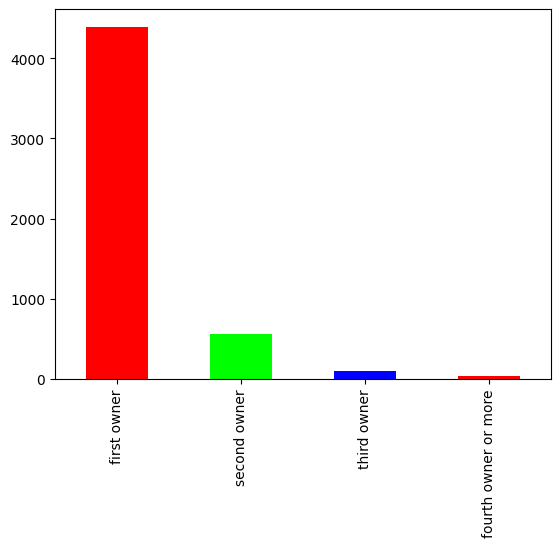

In [48]:
colors = ['#FF0000', '#00FF00', '#0000FF']  # Specify the colors for the bars

data['owner'].value_counts().plot(kind='bar', color=colors)
plt.show()

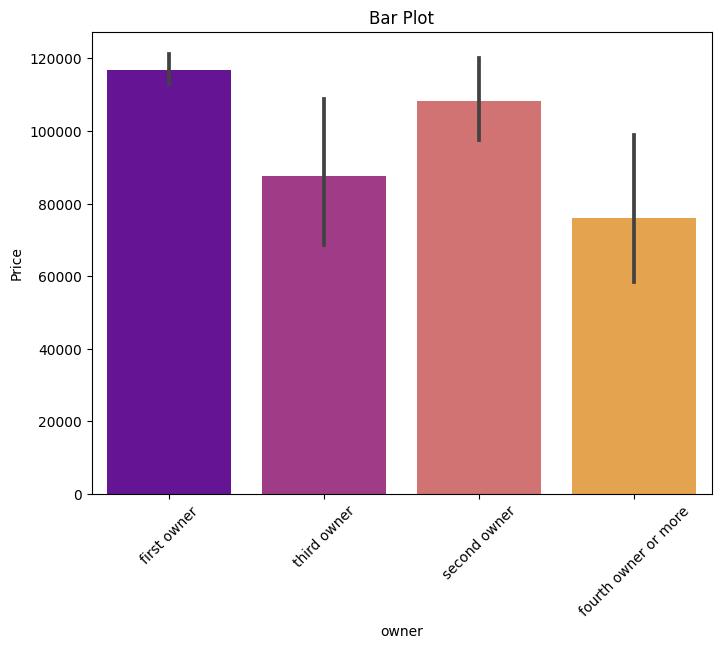

In [49]:

plt.figure(figsize=(8, 6))  # Increase figure size

#colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF']  # Specify the colors for the bars

sns.barplot(data=data, x=data['owner'], y='price', palette='plasma')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xlabel('owner')  # Add x-axis label
plt.ylabel('Price')  # Add y-axis label
plt.title('Bar Plot')  # Add plot title

plt.show()

In [50]:
data['price'].unique()

array([ 63500, 115000, 300000, ...,  26500,  39899,  61740])

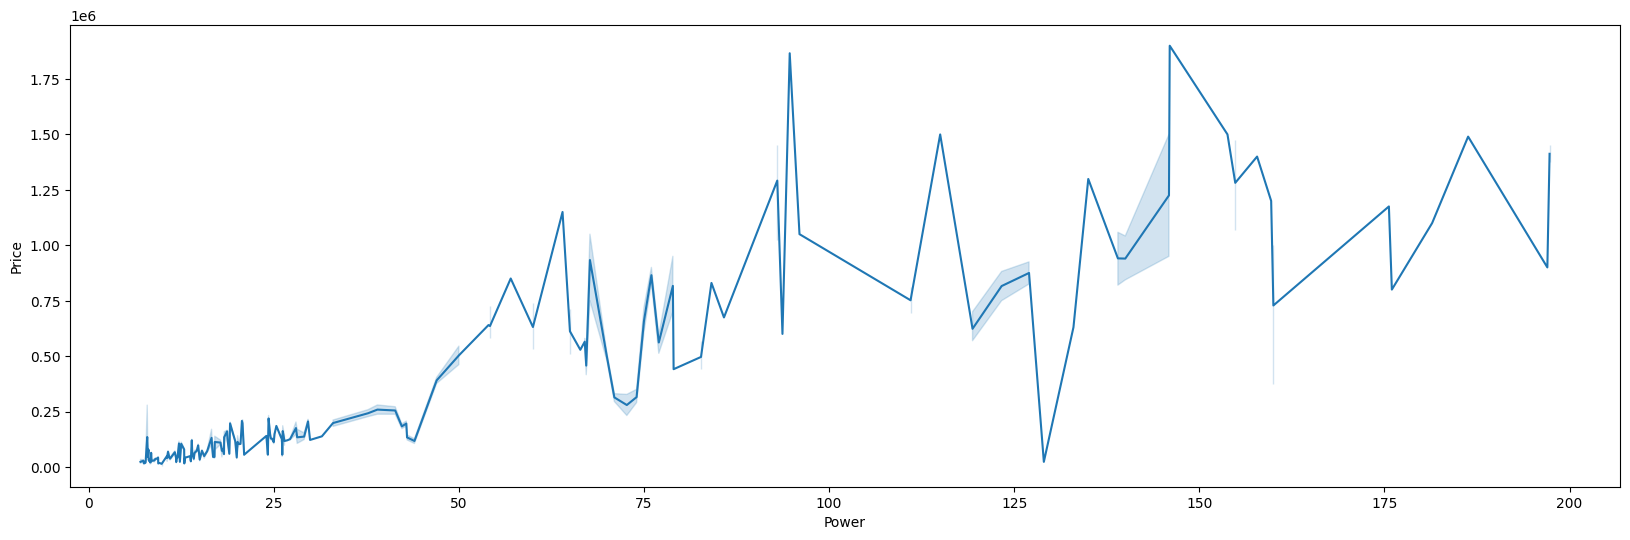

In [51]:
plt.figure(figsize=(20, 6))

colors = sns.color_palette('viridis', len(data['power'].unique()))

sns.lineplot(data=data, y='price', x='power', palette=colors)
plt.xticks(rotation=0)
plt.xlabel('Power')
plt.ylabel('Price')

plt.show()

In [52]:
fre = data['location'].value_counts()[:10]

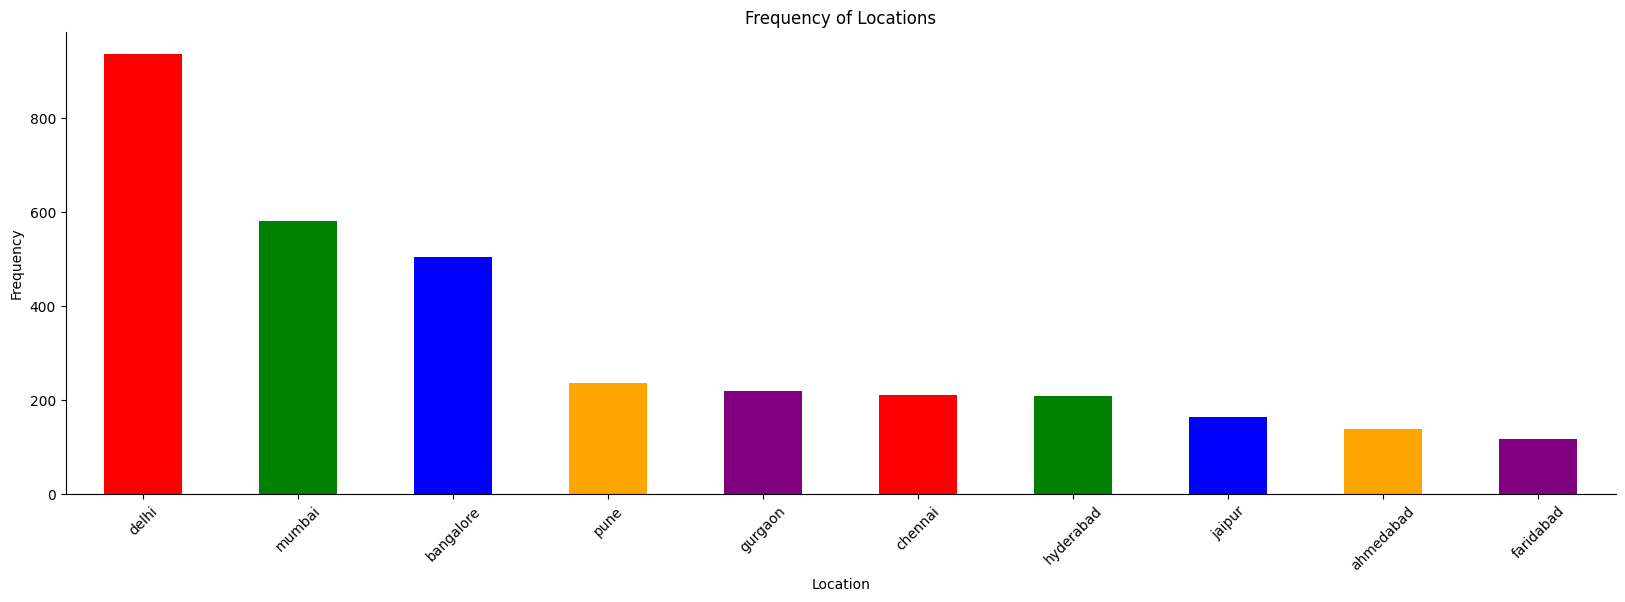

In [53]:
fig, ax = plt.subplots(figsize=(20, 6))
Color= ['red', 'green', 'blue', 'orange', 'purple']

fre.plot(kind='bar', color=Color, ax=ax)

# Customize the plot aesthetics
ax.set_xlabel('Location')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Locations')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', rotation=45)

plt.show()

In [54]:
loc_pri = data[['location','price']].sort_values(by='price',ascending=False)[:30]

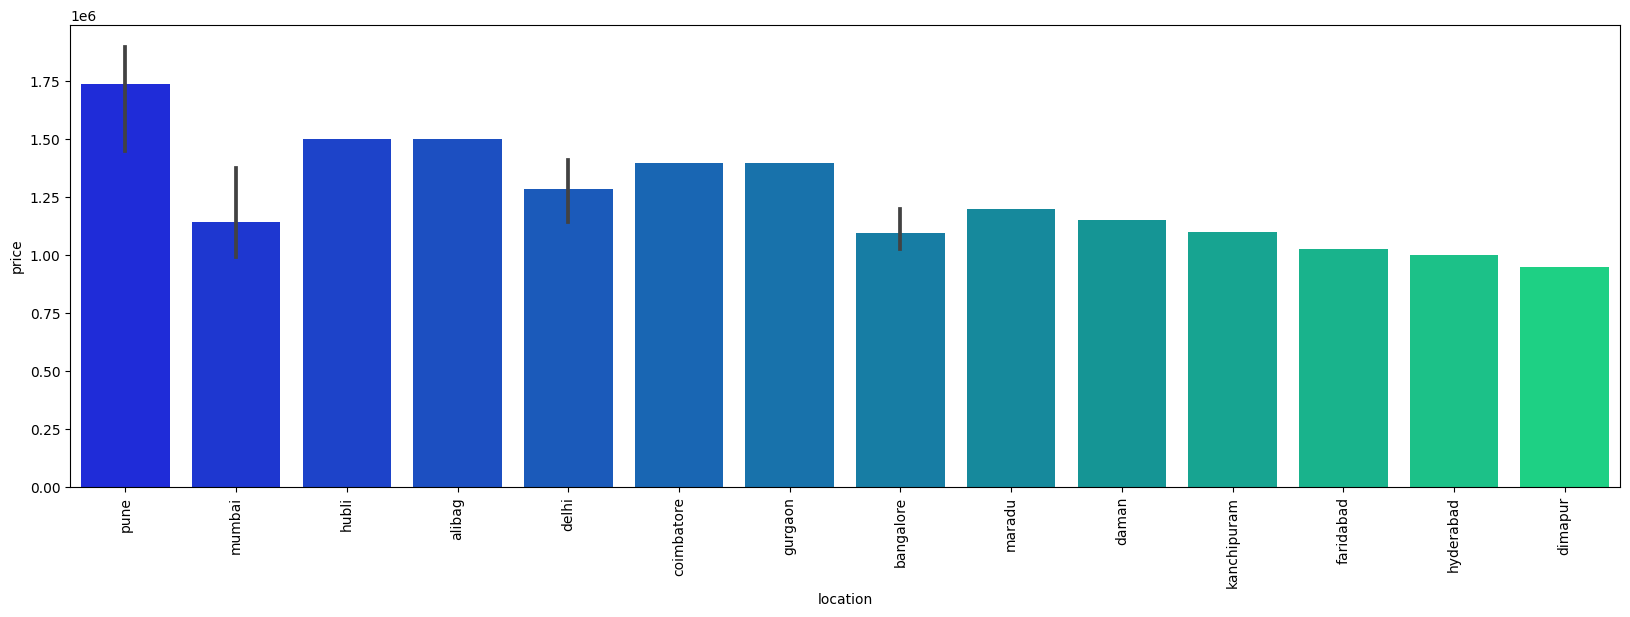

In [55]:
plt.figure(figsize=(20,6))

sns.barplot(data=loc_pri, x='location', y='price', palette='winter')
plt.xticks(rotation='vertical')

plt.show()

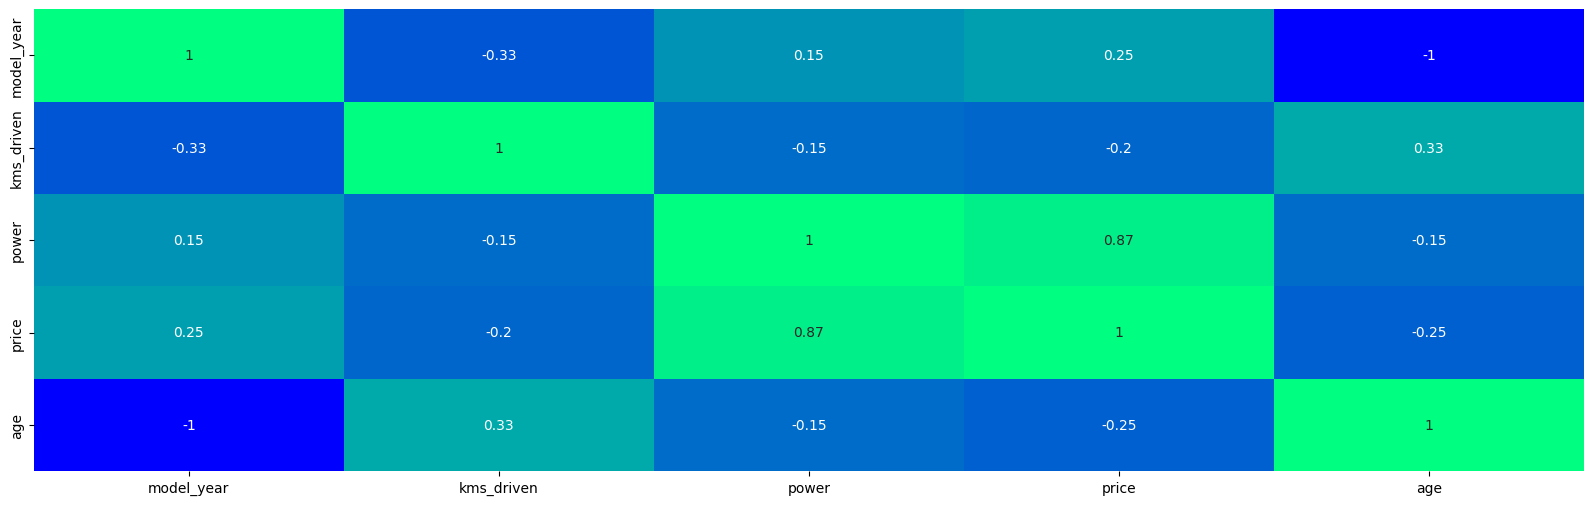

In [56]:
plt.figure(figsize=(20,6))

sns.heatmap(data.corr(),annot=True,cbar=False,cmap='winter')
plt.show()

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🏭Model Building<a class="anchor" id="3"></a>

In [74]:
data1 = data.copy()

In [75]:
data1.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,35.0,19.0,63500,Bajaj,Avenger Cruise,6
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,35.0,19.8,115000,Royal,Enfield Classic,7
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,30.0,28.0,300000,Hyosung,GT250R 2012,11
5,KTM Duke 200cc 2012,2012,24561,third owner,bangalore,35.0,25.0,63400,KTM,Duke 200cc,11
6,Bajaj Pulsar 180cc 2016,2016,19718,first owner,bangalore,65.0,17.0,55000,Bajaj,Pulsar 180cc,7


In [76]:
data1 = data1[(data1['mileage'] < 70) & (data1['mileage'] > 20)]
data1 = data1[data1['age'] < 10]


In [77]:
data['mileage'] = data['mileage'].astype(float)


In [78]:
encoder =LabelEncoder()

In [79]:
columns = ['model_name','owner','location','company','bike_model','model_year']

In [80]:
print(data1.columns)

Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price', 'company', 'bike_model', 'age'],
      dtype='object')


In [81]:
features = ['model_year', 'kms_driven', 'owner', 'location', 'mileage', 'power','company', 'bike_model', 'age']
x = data1[features]
y = data1['price']
x.shape, y.shape

((3471, 9), (3471,))

In [82]:
for i in columns:
    data1[i] = encoder.fit_transform(data1[i])

In [83]:
data1.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,8,3,17000,0,148,35.0,19.0,63500,0,7,6
1,346,2,50000,0,148,35.0,19.8,115000,11,30,7
6,57,2,19718,0,38,65.0,17.0,55000,0,81,7
8,262,4,1350,0,154,25.0,42.9,198000,8,28,5
10,348,4,25000,0,82,35.0,19.8,136900,11,30,5


In [84]:
data1.drop(columns=['model_name'],inplace=True)

In [85]:
X= data1.drop(columns=['price'],axis=1)
y=data1['price']

In [86]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
predict_lr = lr.predict(x_test)

In [90]:
score_lr = round((lr.score(x_test,y_test)*100),2)
print ("Model Score",score_lr,"%")

Model Score 73.66 %


In [91]:
rid =Ridge(alpha=100)

In [92]:
rid.fit(x_train,y_train)

Ridge(alpha=100)

In [93]:
predic_rid = rid.predict(x_test)

In [94]:
score_rid = round((rid.score(x_test,y_test)*100),2)
print ("Model Score",score_rid,"%")

Model Score 73.66 %


In [95]:
df = ["Liner Regression",score_lr]

In [96]:
data1.columns

Index(['model_year', 'kms_driven', 'owner', 'location', 'mileage', 'power',
       'price', 'company', 'bike_model', 'age'],
      dtype='object')

In [97]:
data1.head()

,model_year,kms_driven,owner,location,mileage,power,price,company,bike_model,age
0,3,17000,0,148,35.0,19.0,63500,0,7,6
1,2,50000,0,148,35.0,19.8,115000,11,30,7
6,2,19718,0,38,65.0,17.0,55000,0,81,7
8,4,1350,0,154,25.0,42.9,198000,8,28,5
10,4,25000,0,82,35.0,19.8,136900,11,30,5


In [98]:
import pickle

filename = 'bike_price_in_india.sav'
pickle.dump(lr,open(filename,'wb'))